In [ ]:
#Loading technique
from google.colab import files
uploaded =files.upload()

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv('/content/finaldata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   combined  1449 non-null   float64
 1   negative  1449 non-null   float64
 2   neutral   1449 non-null   float64
 3   positive  1449 non-null   float64
 4   inc/dec   1449 non-null   float64
dtypes: float64(5)
memory usage: 56.7 KB


In [ ]:
df.dtypes

combined    float64
negative    float64
neutral     float64
positive    float64
inc/dec     float64
dtype: object

In [ ]:
df['inc/dec'] == 1.0

0       False
1       False
2       False
3       False
4       False
        ...  
1444    False
1445    False
1446    False
1447    False
1448    False
Name: inc/dec, Length: 1449, dtype: bool

In [ ]:
print(df.head())
print(df['inc/dec'].value_counts())

#dropping this insignificant 1.0 rows
df_c = df.copy()
df_c.drop(df_c.loc[df_c['inc/dec']==1.0].index, inplace=True)

print(df_c['inc/dec'].value_counts())

   combined  negative   neutral  positive  inc/dec
0   0.00000  0.000000  1.000000  0.000000      2.0
1   0.34000  0.000000  0.806000  0.194000      0.0
2   0.03530  0.147538  0.780308  0.072154      2.0
3   0.20105  0.000000  0.662250  0.337750      2.0
4   0.17195  0.078750  0.653750  0.267500      2.0
2.0    776
0.0    668
1.0      5
Name: inc/dec, dtype: int64
2.0    776
0.0    668
Name: inc/dec, dtype: int64


In [ ]:




TARGET = "inc/dec"
columns_predictors = [col for col in df_c.columns if col not in [TARGET]]

print(f"TARGET: {TARGET}")
print(f"columns_predictors: {columns_predictors}")

X = df_c[columns_predictors]
y = df_c[TARGET]
display(X)
display(y)



TARGET: inc/dec
columns_predictors: ['combined', 'negative', 'neutral', 'positive']


,combined,negative,neutral,positive
0,0.000000,0.000000,1.000000,0.000000
1,0.340000,0.000000,0.806000,0.194000
2,0.035300,0.147538,0.780308,0.072154
3,0.201050,0.000000,0.662250,0.337750
4,0.171950,0.078750,0.653750,0.267500
...,...,...,...,...
1444,0.110212,0.100412,0.759765,0.139765
1445,-0.571900,0.174000,0.756000,0.070000
1446,0.100038,0.082125,0.643625,0.274125
1447,0.115262,0.038231,0.815077,0.146692


0       2.0
1       0.0
2       2.0
3       2.0
4       2.0
       ... 
1444    2.0
1445    0.0
1446    0.0
1447    0.0
1448    0.0
Name: inc/dec, Length: 1444, dtype: float64

In [ ]:
df.shape , df_c.shape #looks good
#5 1.0 values gone


((1449, 5), (1444, 5))

2.0    776
0.0    668
Name: inc/dec, dtype: int64

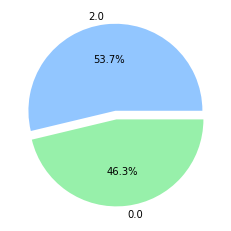

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display



def check_data_balance(series, style="seaborn-pastel"):
  with plt.style.context(style):
    unique = series.value_counts()
    display(unique) #show unique value counts of the target
    plt.pie(unique, explode=[0.05]*len(unique), labels=unique.index, autopct='%1.1f%%'); #plot a pie chart for the target to see if data are balanced

check_data_balance(df_c[TARGET])

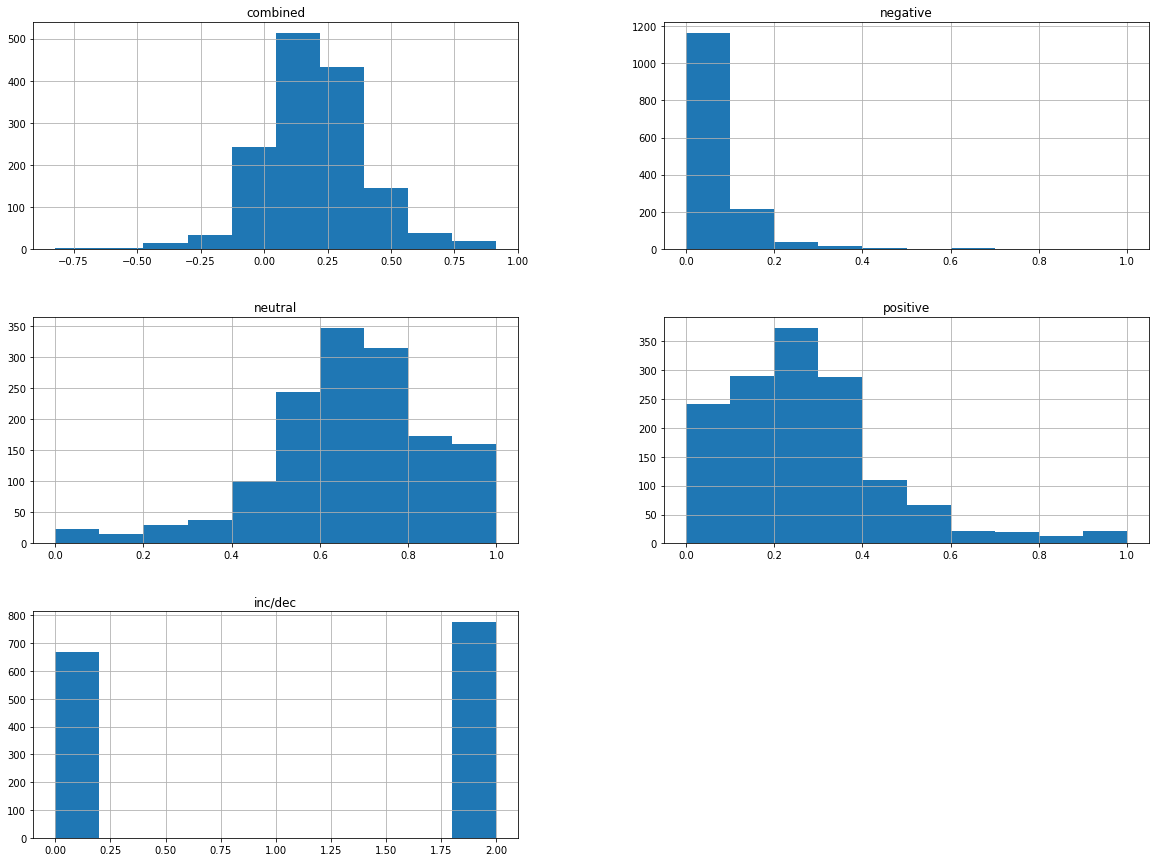

In [ ]:
_ = df_c.hist(figsize=(20,15))


In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

SS = StandardScaler()
SS.fit(X)

StandardScaler()

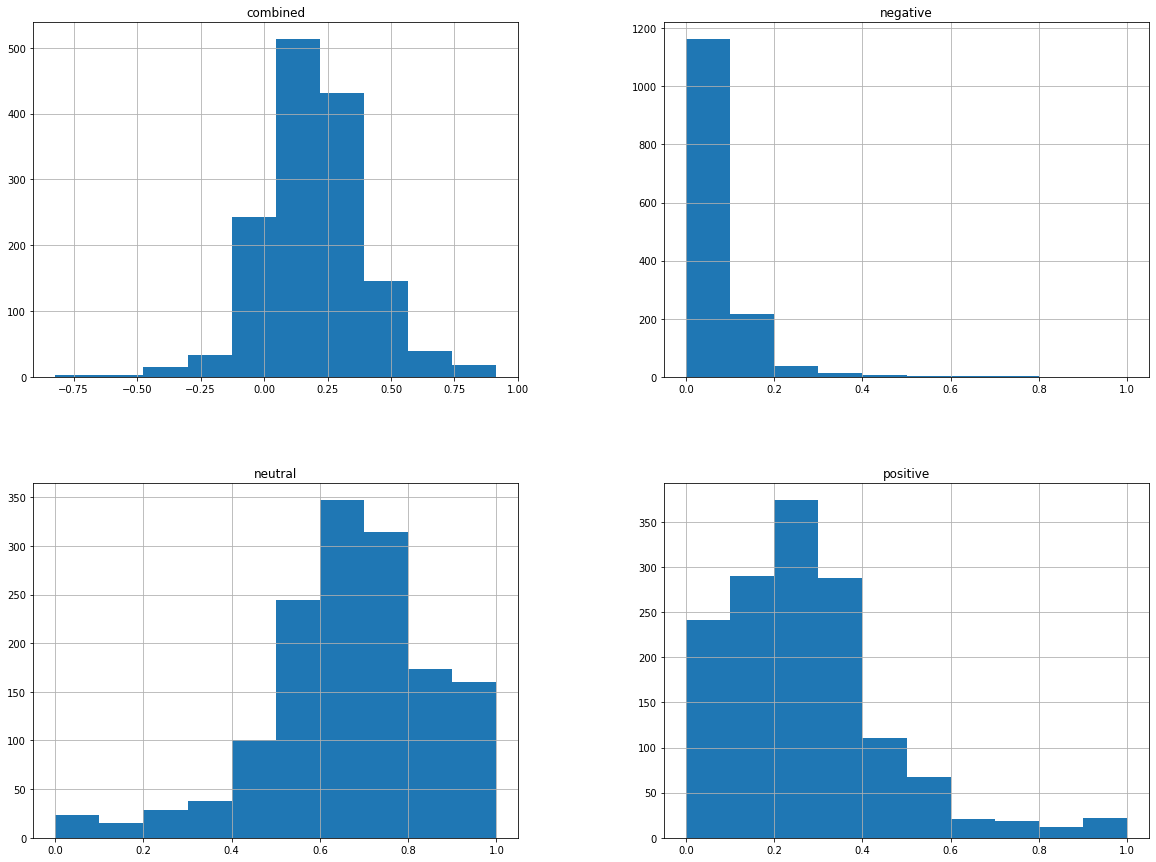

In [ ]:
_ = X.hist(figsize=(20,15))

In [ ]:
#classification pipeline

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10086, stratify=y) #stratified sampling based on the target
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (1083, 4)
X_test.shape: (361, 4)
y_train.shape: (1083,)
y_test.shape: (361,)


In [ ]:
#getting really bad results so i will now drop the rows with value 1.0 its very small.

In [ ]:

#I know how ensembling works so i will simultaneously apply different models and see which returns the best accuracy score.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

# Set seed for reproducibility
SEED=1
# Instantiate lr
lr = LogisticRegression(random_state=SEED)
# Instantiate knn
knn = KNeighborsClassifier(n_neighbors=2)
# Instantiate dt
dt = DecisionTreeClassifier(random_state=SEED)
#Instantiate rf
rf = RandomForestClassifier()
#Instantiate svc
svc = SVC(kernel='linear',  gamma = 10, C= 1)
#Instantiate AdaBoost
AdaBC = AdaBoostClassifier()
#Instantiate XGB
XGBC = XGBClassifier()


# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), 
               ('Decision Tree Classification ', dt), ('Random Forest' , rf), 
               ('SVC', svc),('AdaBoostClassifier', AdaBC) 
               ]


# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
    # Fit clf to the training set
    clf.fit(X_train, y_train)    

    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
    # Confusion Matrix
    c_matrix= confusion_matrix(y_test,y_pred)
    #classification reports
    c_report = classification_report(y_test,y_pred)
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))
    print(c_matrix)
    print(c_report)

Logistic Regression : 0.537
[[  0 167]
 [  0 194]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       167
         2.0       0.54      1.00      0.70       194

    accuracy                           0.54       361
   macro avg       0.27      0.50      0.35       361
weighted avg       0.29      0.54      0.38       361

K Nearest Neighbours : 0.499
[[129  38]
 [143  51]]
              precision    recall  f1-score   support

         0.0       0.47      0.77      0.59       167
         2.0       0.57      0.26      0.36       194

    accuracy                           0.50       361
   macro avg       0.52      0.52      0.47       361
weighted avg       0.53      0.50      0.47       361

Decision Tree Classification  : 0.526
[[ 72  95]
 [ 76 118]]
              precision    recall  f1-score   support

         0.0       0.49      0.43      0.46       167
         2.0       0.55      0.61      0.58       194

    accuracy      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : 0.521
[[ 79  88]
 [ 85 109]]
              precision    recall  f1-score   support

         0.0       0.48      0.47      0.48       167
         2.0       0.55      0.56      0.56       194

    accuracy                           0.52       361
   macro avg       0.52      0.52      0.52       361
weighted avg       0.52      0.52      0.52       361

SVC : 0.537
[[  0 167]
 [  0 194]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       167
         2.0       0.54      1.00      0.70       194

    accuracy                           0.54       361
   macro avg       0.27      0.50      0.35       361
weighted avg       0.29      0.54      0.38       361

AdaBoostClassifier : 0.540
[[ 46 121]
 [ 45 149]]
              precision    recall  f1-score   support

         0.0       0.51      0.28      0.36       167
         2.0       0.55      0.77      0.64       194

    accuracy                           0.54       36

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:


#evaluate the performance of a voting classifier that takes the outputs of the 
#models defined in the list classifiers and assigns labels by majority voting.

# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.554


In [ ]:
import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_tf1 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  ## After TensorFlow 2.7.0 ##
  tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons with input_shape defined (None, 1) = look at 1 sample at a time
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_tf1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_tf1.fit(X, y, epochs=100) # fit for 100 passes of the data

Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.9297 - accuracy: 0.2439
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: -0.2944 - accuracy: 0.0042
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: -0.9572 - accuracy: 8.6565e-04
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: -1.1286 - accuracy: 8.6565e-04
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: -1.1327 - accuracy: 8.6565e-04
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: -1.1334 - accuracy: 8.6565e-04
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: -1.1453 - accuracy: 5.1939e-04
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: -1.1474 - accuracy: 0.0000e+00
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: -1.1455 - accuracy: 0.0000e+00
Epoch 10/100
46/46 [==============================] - 0s 3ms/step - loss: